# **Central Asia cold spell**

In [1]:
import sys; sys.path.append('/home/clair/wwa')
from wwa import *

## **Identify affected region (CPC)**

In [3]:
# # min temps at suggested timescales
# cpc = xr.open_mfdataset("../../Data/cpc/tmin.*.nc").sel(lat = slice(70,20), lon = slice(50,120)).tmin
# [cpc.rolling(time = n, center = False).mean().resample(time = "AS-JUL").min().to_netcdf("data/cpc_TN"+str(n)+"n_50-120E_20-70N.nc") for n in [1,7,14,30]]

### **Spatial & temporal extent**

In [177]:
cpc = xr.concat([xr.open_dataset("data/cpc_TN"+str(n)+"n_50-120E_20-70N.nc").expand_dims(ndays = [n]) for n in [1,7,14,30]], "ndays").tmin
cpc_scaled = ((cpc - cpc.mean("time")) / cpc.std("time")).assign_attrs(long_name = "Standardised anomaly in minimum temperature", units = "SD")

# subregion to look at more closely
sub = [50,90,30,50]

Text(0.5, 0.98, 'Spatial & temporal extent of January 2023 minimum')

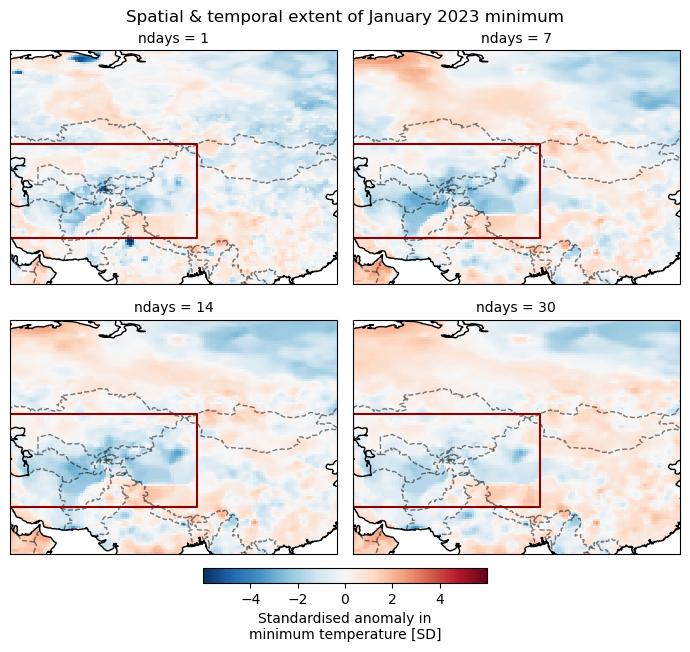

In [178]:
cpc_scaled.sel(time = "2022").plot(col = "ndays", col_wrap = 2, subplot_kws = {"projection" : cartopy.crs.PlateCarree()}, sharey = True, 
                                   cbar_kwargs =  {"location" : "bottom", "fraction" : 0.025, "pad" : 0.025, "shrink" : 0.95})

for ax in plt.gcf().axes[:-1]:
    ax.coastlines(lw = 1)
    ax.add_feature(cartopy.feature.BORDERS, lw = 1, ls = "--", alpha = 0.5)
    
    ax.plot([sub[0],sub[1],sub[1],sub[0],sub[0]], [sub[2],sub[2],sub[3],sub[3],sub[2]], color = "darkred")
    
plt.suptitle("Spatial & temporal extent of January 2023 minimum")

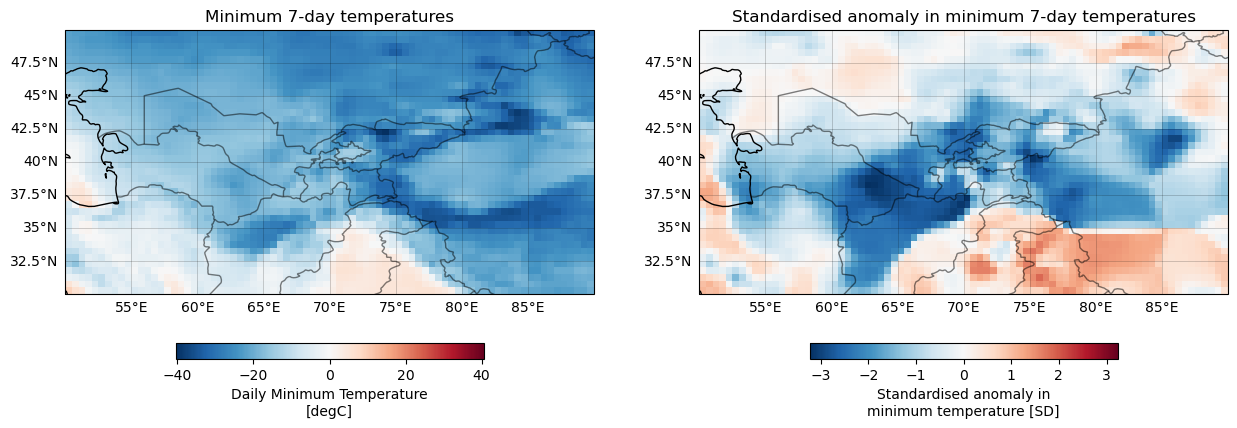

In [188]:
fig, axs = plt.subplots(ncols = 2, figsize = (15,8), subplot_kw = {"projection" : cartopy.crs.PlateCarree()}, dpi = 100)

cbar_kwargs =  {"location" : "bottom", "fraction" : 0.025, "pad" : 0.08, "shrink" : 0.95}

cpc.sel(time = "2022", ndays = 7, lat = slice(sub[3],sub[2]), lon = slice(sub[0], sub[1])).plot(ax = axs[0], cbar_kwargs = cbar_kwargs)
cpc_scaled.sel(time = "2022", ndays = 7, lat = slice(sub[3],sub[2]), lon = slice(sub[0], sub[1])).plot(ax = axs[1], cbar_kwargs = cbar_kwargs)

axs[0].set_title("Minimum 7-day temperatures")
axs[1].set_title("Standardised anomaly in minimum 7-day temperatures")

for ax in axs:
    ax.coastlines(lw = 1)
    ax.add_feature(cartopy.feature.BORDERS, lw = 1, alpha = 0.5)
    ax.gridlines(crs=cartopy.crs.PlateCarree(), linewidth=0.5, color='black', draw_labels=["bottom", "left"], alpha=0.25)

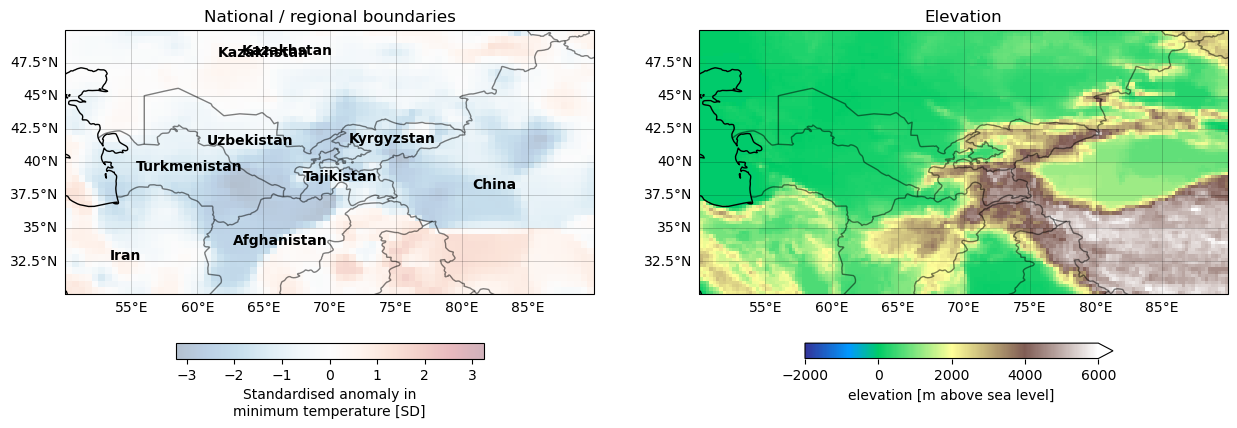

In [315]:
fig, axs = plt.subplots(ncols = 2, figsize = (15,8), subplot_kw = {"projection" : cartopy.crs.PlateCarree()}, dpi = 100)

cpc_scaled.sel(time = "2022", ndays = 7, lat = slice(sub[3],sub[2]), lon = slice(sub[0], sub[1])).plot(ax = axs[0],alpha = 0.3, cbar_kwargs = cbar_kwargs)
[axs[0].annotate(ctry, xy = get_latlon(ctry).values(), fontweight = "bold", ha='center') for ctry in ["Afghanistan", "Uzbekistan", "Turkmenistan", "Tajikistan", "Kyrgyzstan", "Kazakhstan", "Iran"]]
axs[0].annotate("China", xy = [82.5, 38], fontweight = "bold", ha='center')
axs[0].annotate("Kazakhstan", xy = [65, 48], fontweight = "bold", ha='center')

elev = xr.open_dataset("../90_data/tbase_elev-0.25deg.nc").elev.sel(lat = slice(sub[2],sub[3]), lon = slice(sub[0], sub[1]))
elev.plot(ax = axs[1], cmap = "terrain", vmin = -2000, vmax = 6000, cbar_kwargs = cbar_kwargs)

axs[0].set_title("National / regional boundaries")
axs[1].set_title("Elevation")

for ax in axs:
    ax.coastlines(lw = 1)
    ax.add_feature(cartopy.feature.BORDERS, lw = 1, alpha = 0.5)
    ax.gridlines(crs=cartopy.crs.PlateCarree(), linewidth=0.5, color='black', draw_labels=["bottom", "left"], alpha=0.25)

<GeoAxesSubplot: title={'center': 'ndays = 7, time = 2022-07-01'}, xlabel='Longitude [degrees_east]', ylabel='Latitude [degrees_north]'>

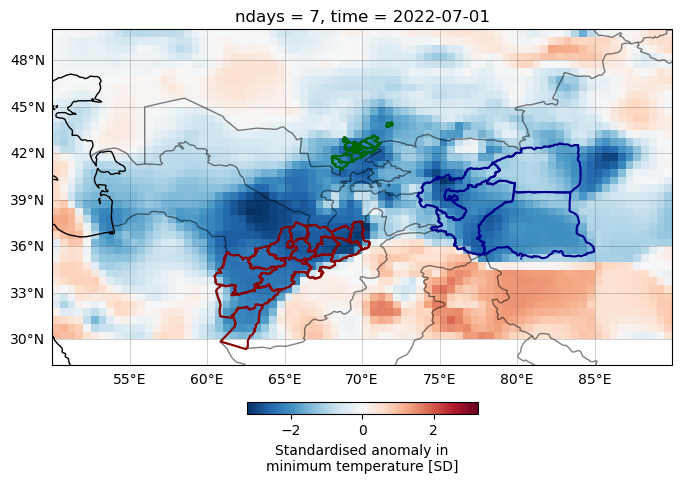

In [308]:
cpc_scaled.sel(time = "2022", ndays = 7, lat = slice(sub[3],sub[2]), lon = slice(sub[0], sub[1])).plot(subplot_kws = {"projection" : cartopy.crs.PlateCarree()}, 
                                              cbar_kwargs =  {"location" : "bottom", "fraction" : 0.025, "pad" : 0.08, "shrink" : 0.95}, figsize = (8,6))

ax = plt.gcf().axes[0]
ax.coastlines(lw = 1)
ax.add_feature(cartopy.feature.BORDERS, lw = 1, alpha = 0.5)
ax.gridlines(crs=cartopy.crs.PlateCarree(), linewidth=0.5, color='black', draw_labels=["bottom", "left"], alpha=0.25)

afg = gpd.read_file("sf/afg_adm1").to_crs(cartopy.crs.PlateCarree())
chn = gpd.read_file("sf/chn_adm2").to_crs(cartopy.crs.PlateCarree()); chn = chn.loc[chn.geometry.centroid.x < 85]
kaz = gpd.read_file("sf/kaz_adm2").to_crs(cartopy.crs.PlateCarree()); kaz = kaz.loc[(kaz.geometry.centroid.y < 44) & (kaz.geometry.centroid.x > 67)]

afg.iloc[[1,2,3,4,6,7,9,11,12,23,29,30,31,18]].boundary.plot(ax = ax, color = "darkred")
chn.loc[[20,21,22,23]].boundary.plot(ax = ax, color = "darkblue")
kaz.loc[(kaz.geometry.centroid.y < 43) & (kaz.geometry.centroid.x < 71) & (kaz.geometry.centroid.x > 68.5)].boundary.plot(ax = ax, color = "darkgreen")

### **How extreme was the event?**

In [316]:
from wwa_nonstationary_fitting import *

In [319]:
cpc_tn7n_fit = ns_mapfit(gev, "shift", cpc.sel(ndays = 7, drop = True), ds.gmst)

NameError: name 'ds' is not defined

In [320]:
gmst = pd.read_csv("/home/clair/wwa/90_data/gmst.dat", comment = "#", sep = " .", engine = "python", header = None, names = ["time","gmst"], parse_dates = True, index_col = "time").to_xarray()
gmst = gmst.sel(time = cpc.time)

In [325]:
[np.datetime64(startdate + relativedelta(months = 6)) for i in range(len(ts.time))]

In [340]:
[np.datetime64(str(y+1)+"-01-01T00:00.0000000") for y in cpc.time.dt.year.values]

/tmp/ipykernel_52568/3285936218.py:1: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
  [np.datetime64(str(y+1)+"-01-01T00:00.0000000") for y in cpc.time.dt.year.values]


ValueError: Error parsing datetime string "1979-01-01T00:00.0000000" at position 16

In [337]:
gmst.time

<xarray.DataArray 'time' (time: 154)>
array(['1879-01-01T00:00:00.000000000', '1880-01-01T00:00:00.000000000',
       '1881-01-01T00:00:00.000000000', '1882-01-01T00:00:00.000000000',
       '1883-01-01T00:00:00.000000000', '1884-01-01T00:00:00.000000000',
       '1885-01-01T00:00:00.000000000', '1886-01-01T00:00:00.000000000',
       '1887-01-01T00:00:00.000000000', '1888-01-01T00:00:00.000000000',
       '1889-01-01T00:00:00.000000000', '1890-01-01T00:00:00.000000000',
       '1891-01-01T00:00:00.000000000', '1892-01-01T00:00:00.000000000',
       '1893-01-01T00:00:00.000000000', '1894-01-01T00:00:00.000000000',
       '1895-01-01T00:00:00.000000000', '1896-01-01T00:00:00.000000000',
       '1897-01-01T00:00:00.000000000', '1898-01-01T00:00:00.000000000',
       '1899-01-01T00:00:00.000000000', '1900-01-01T00:00:00.000000000',
       '1901-01-01T00:00:00.000000000', '1902-01-01T00:00:00.000000000',
       '1903-01-01T00:00:00.000000000', '1904-01-01T00:00:00.000000000',
       '1905-01-01T00:00:00.000000000', '1906-01-01T00:00:00.000000000',
       '1907-01-01T00:00:00.000000000', '1908-01-01T00:00:00.000000000',
       '1909-01-01T00:00:00.000000000', '1910-01-01T00:00:00.000000000',
       '1911-01-01T00:00:00.000000000', '1912-01-01T00:00:00.000000000',
       '1913-01-01T00:00:00.000000000', '1914-01-01T00:00:00.000000000',
       '1915-01-01T00:00:00.000000000', '1916-01-01T00:00:00.000000000',
       '1917-01-01T00:00:00.000000000', '1918-01-01T00:00:00.000000000',
       '1919-01-01T00:00:00.000000000', '1920-01-01T00:00:00.000000000',
       '1921-01-01T00:00:00.000000000', '1922-01-01T00:00:00.000000000',
       '1923-01-01T00:00:00.000000000', '1924-01-01T00:00:00.000000000',
       '1925-01-01T00:00:00.000000000', '1926-01-01T00:00:00.000000000',
       '1927-01-01T00:00:00.000000000', '1928-01-01T00:00:00.000000000',
       '1929-01-01T00:00:00.000000000', '1930-01-01T00:00:00.000000000',
       '1931-01-01T00:00:00.000000000', '1932-01-01T00:00:00.000000000',
       '1933-01-01T00:00:00.000000000', '1934-01-01T00:00:00.000000000',
       '1935-01-01T00:00:00.000000000', '1936-01-01T00:00:00.000000000',
       '1937-01-01T00:00:00.000000000', '1938-01-01T00:00:00.000000000',
       '1939-01-01T00:00:00.000000000', '1940-01-01T00:00:00.000000000',
       '1941-01-01T00:00:00.000000000', '1942-01-01T00:00:00.000000000',
       '1943-01-01T00:00:00.000000000', '1944-01-01T00:00:00.000000000',
       '1945-01-01T00:00:00.000000000', '1946-01-01T00:00:00.000000000',
       '1947-01-01T00:00:00.000000000', '1948-01-01T00:00:00.000000000',
       '1949-01-01T00:00:00.000000000', '1950-01-01T00:00:00.000000000',
       '1951-01-01T00:00:00.000000000', '1952-01-01T00:00:00.000000000',
       '1953-01-01T00:00:00.000000000', '1954-01-01T00:00:00.000000000',
       '1955-01-01T00:00:00.000000000', '1956-01-01T00:00:00.000000000',
       '1957-01-01T00:00:00.000000000', '1958-01-01T00:00:00.000000000',
       '1959-01-01T00:00:00.000000000', '1960-01-01T00:00:00.000000000',
       '1961-01-01T00:00:00.000000000', '1962-01-01T00:00:00.000000000',
       '1963-01-01T00:00:00.000000000', '1964-01-01T00:00:00.000000000',
       '1965-01-01T00:00:00.000000000', '1966-01-01T00:00:00.000000000',
       '1967-01-01T00:00:00.000000000', '1968-01-01T00:00:00.000000000',
       '1969-01-01T00:00:00.000000000', '1970-01-01T00:00:00.000000000',
       '1971-01-01T00:00:00.000000000', '1972-01-01T00:00:00.000000000',
       '1973-01-01T00:00:00.000000000', '1974-01-01T00:00:00.000000000',
       '1975-01-01T00:00:00.000000000', '1976-01-01T00:00:00.000000000',
       '1977-01-01T00:00:00.000000000', '1978-01-01T00:00:00.000000000',
       '1979-01-01T00:00:00.000000000', '1980-01-01T00:00:00.000000000',
       '1981-01-01T00:00:00.000000000', '1982-01-01T00:00:00.000000000',
       '1983-01-01T00:00:00.000000000', '1984-01-01T00:00:00.000000000',
       '1985-01-01T00:00:00.000000000', '1986-01-01T00:00:00.000000000',
       '1987-01-01T0

UFuncTypeError: ufunc 'add' cannot use operands with types dtype('<M8[ns]') and dtype('O')

### **When was the min temp achieved?**

In [14]:
cpc = xr.open_dataset("../../Data/cpc/tmin.2023.nc").sel(lat = slice(70,20), lon = slice(50,120)).tmin

Text(0.5, 1.0, 'Timing of 2023 minimum temperatures (CPC)')

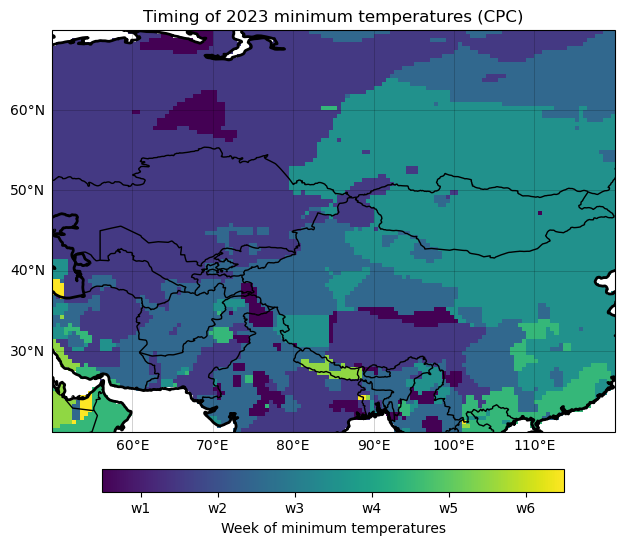

In [56]:
cpcmin_doy = xr.apply_ufunc(np.digitize, cpc.idxmin("time").dt.dayofyear, kwargs={'bins': range(0,49,7)}).where(~np.isnan(cpc.isel(time = 0)))

fig, ax = plt.subplots(figsize = (8,6), subplot_kw = {"projection" : cartopy.crs.PlateCarree()}, dpi = 100)
cbar = cpcmin_doy.plot(ax = ax, add_colorbar = False)

cbar_ax = plt.colorbar(cbar, ax = ax, location = "bottom", fraction = 0.05, pad = 0.08, ticks=list([x + 0.5 for x in range(0,7)]), label = "Week of minimum temperatures")
cbar_ax.ax.set_xticklabels(["w" + str(x) for x in range(7)])

ax.coastlines(lw = 2)
ax.add_feature(cartopy.feature.BORDERS, lw = 1)
ax.gridlines(crs=cartopy.crs.PlateCarree(), linewidth=0.5, color='black', draw_labels=["bottom", "left"], alpha=0.25)

plt.title("Timing of 2023 minimum temperatures (CPC)")